## **REPUBLICAN AND DEMOCRAT TWEET ANALYSIS**

### Republican Party 

The Republican Party, also referred to as the GOP (Grand Old Party), is one of the two major political parties in the United States; the other is its historic rival, the Democratic Party.

### Democratic Party

The Democratic Party is one of the two major contemporary political parties in the United States, along with its rival, the Republican Party.

In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))

['ExtractedTweets.csv', 'TwitterHandles.csv']


In this kernel, I examined the tweets of people with democratic and republican political opinion.

### CONTENTS:

1- [Data Cleaning](#1)

2- [Frequency of Usage of Words by Parties](#2)

3- [Dispersion Plots](#3)

4- [Sentiment Analysis](#4)

In [2]:
data=pd.read_csv("../input/ExtractedTweets.csv")

The first 10 entries of our dataset are shown in the table.

In [3]:
data.head(10)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
5,Democrat,RepDarrenSoto,RT @EmgageActionFL: Thank you to all who came ...
6,Democrat,RepDarrenSoto,Hurricane Maria left approx $90 billion in dam...
7,Democrat,RepDarrenSoto,RT @Tharryry: I am delighted that @RepDarrenSo...
8,Democrat,RepDarrenSoto,RT @HispanicCaucus: Trump's anti-immigrant pol...
9,Democrat,RepDarrenSoto,RT @RepStephMurphy: Great joining @WeAreUnidos...


And the first tweet is as follows.

In [4]:
data.Tweet[0]

'Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L'

<a id="1"></a> <br>
## 1- DATA CLEANING

Before starting the analysis, we should remove like @, rt, html, # etc. objects. 

In [5]:
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
stopwords = stopwords.words('english')
#add some unnecessary word to stopwords list
stopwords.append("rt")
stopwords.append("u")
stopwords.append("amp")
stopwords.append("w")
stopwords.append("th")

In [6]:
#we created 2 different class as democrat and republican
democrat=data[data.Party=="Democrat"]
republican=data[data.Party=="Republican"]

In [7]:
#Cleaning democrat party tweets 
democrat_list=[]
for d in democrat.Tweet:
    d=re.sub(r'http\S+', '', d) #remove links
    d=re.sub("[^a-zA-Z]", " ", d) #remove all characters except letters
    d=d.lower() #convert all words to lowercase
    d=nltk.word_tokenize(d) #split sentences into word
    d=[word for word in d if not word in set(stopwords)] #add to stopwords list if unnecessary words.
    lemma=nlp.WordNetLemmatizer() 
    d=[lemma.lemmatize(word) for word in d] #identify the correct form of the word in the dictionary
    d=" ".join(d)
    democrat_list.append(d) #append words to list

In [8]:
#same process as before
republican_list=[]
for r in republican.Tweet:
    r=re.sub(r'http\S+', '', r)
    r=re.sub("[^a-zA-Z]", " ", r)
    r=r.lower()
    r=nltk.word_tokenize(r)
    r=[word for word in r if not word in set(stopwords)]
    lemma=nlp.WordNetLemmatizer()
    r=[lemma.lemmatize(word) for word in r]
    r=" ".join(r)
    republican_list.append(r)

Now our lists are as follows

In [9]:
#first 5 tweets in the list
democrat_list[0:5]

['today senate dems vote savetheinternet proud support similar netneutrality legislation house',
 'winterhavensun winter resident alta vista teacher one several recognized repdarrensoto national teacher apprecia',
 'nbclatino repdarrensoto noted hurricane maria left approximately billion damage congress allocated',
 'nalcabpolicy meeting repdarrensoto thanks taking time meet latinoleader ed marucci guzman nalcabpolicy',
 'vegalteno hurricane season start june st puerto rico readiness well pwr puertorico repdarrensoto espaillatny']

In [10]:
#first 5 tweets in the list
republican_list[0:5]

['wastefulwednesday today introduced bill would eliminate global climate change initiative gc',
 'today honored heroic men woman law enforcement lost life line duty nati',
 'congressmanraja last week repralphnorman hosted briefing economic benefit solar energy production',
 'tegacaypd chief parker thankful receive recognition repralphnorman delivered mayor davidloneal national police',
 'visited sc highway patrol bring cupcake thank service honor']

However I would like to review these tweets word by word. So I split sentences into words and remove unnecessary punctuation characters.

In [11]:

democrat_tweets=str(democrat_list).split()
republican_tweets=str(republican_list).split()
democrat_tweets=[word.replace("'","") for word in democrat_tweets ]
democrat_tweets=[word.replace("[", "") for word in democrat_tweets ]
democrat_tweets=[word.replace("]","") for word in democrat_tweets ]
democrat_tweets=[word.replace(",", "") for word in democrat_tweets ]

republican_tweets=[word.replace("'","") for word in republican_tweets ]
republican_tweets=[word.replace("[", "") for word in republican_tweets ]
republican_tweets=[word.replace("]","") for word in republican_tweets ]
republican_tweets=[word.replace(",", "") for word in republican_tweets ]

Now lets check length of two list.

In [12]:
print("Democrat tweets word length:",len(democrat_tweets))
print("Republican tweets word length:",len(republican_tweets))

Democrat tweets word length: 443138
Republican tweets word length: 457293


There are 443138 words in democrat tweets and 457293 words in republican tweets.

<a id="2"></a> <br>
## 2- Frequency of Usage of Words by Parties

In [13]:
#FreqDist records the number of times each words are used. 
from nltk.probability import FreqDist
fdist_democrat = FreqDist(democrat_tweets)
fdist_republican=FreqDist(republican_tweets)

In [14]:
fdist_democrat

FreqDist({'today': 3850, 'trump': 2502, 'american': 2053, 'year': 1835, 'thank': 1777, 'family': 1694, 'great': 1676, 'student': 1660, 'day': 1571, 'congress': 1518, ...})

For example, the word **"today"** (3850 times) is used most in the tweets sent by democrat people. Secondly **"trump"**(2502) and thirdly **"american"**. 

In [15]:
fdist_republican

FreqDist({'today': 4883, 'tax': 2885, 'great': 2876, 'house': 2382, 'bill': 2379, 'american': 2241, 'thank': 2118, 'year': 1961, 'day': 1887, 'act': 1820, ...})

If we look at the tweets of people who have a republican opinion, the word **"today"** (4883 times) is in the first place again. **"tax"** is in the second place and **"great"** in the third place.

In the following graphs the 30 most used words were shown according to political opinion.

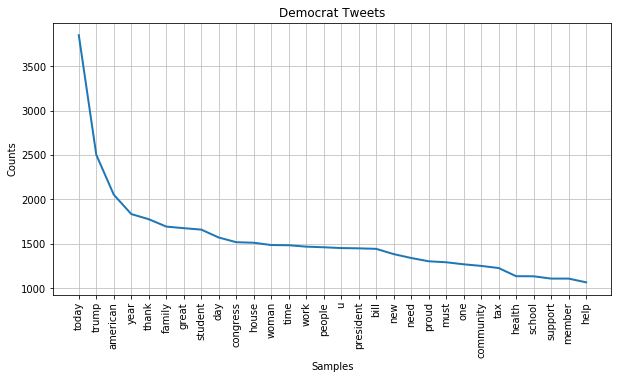

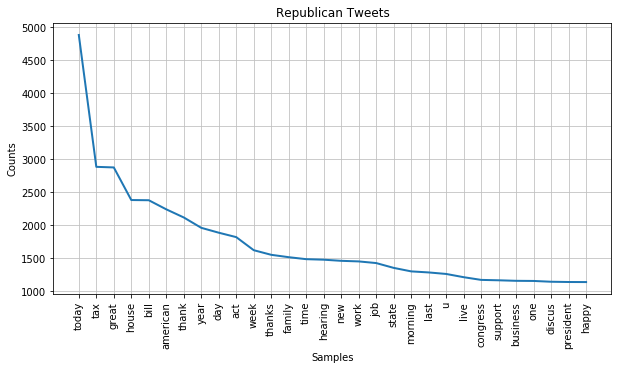

In [16]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
fdist_democrat.plot(30,title="Democrat Tweets")
plt.subplots(figsize=(10,5))
fdist_republican.plot(30,title="Republican Tweets")

In order to better analyze, I merge the two lists and the word frequencies used in the dataframe.

In [17]:
de=pd.DataFrame(list(fdist_democrat.items()), columns = ["Word","FrequencyDemocrat"])
re=pd.DataFrame(list(fdist_republican.items()), columns = ["Word","FrequencyRepublican"])
new=pd.merge(de,re,on='Word')

In [18]:
new.head(10)

,Word,FrequencyDemocrat,FrequencyRepublican
0,today,3850,4883
1,senate,368,533
2,dems,136,61
3,vote,741,722
4,proud,1303,923
5,support,1108,1166
6,similar,34,15
7,netneutrality,287,4
8,legislation,492,689
9,house,1512,2382


We also categorized the word frequencies into 5 groups. 

- if a word is used less than 50, it is in the **very low** group.

- If it's used between 50 and 150 times, it is in the **low ** group. 

- If it's used between 150 and 500 times, it is in the **medium ** group. 

- If it's used between 500 and 1500 times, it is in the **high** group. 

- If usage of a word is greater than 1500, it is in the **very high ** group.

Also we added these new lists to new dataframe. 


In [19]:
democratclass=[] 
for each in new.FrequencyDemocrat:
    if each<50:
        democratclass.append("Very Low")
    elif 49<each<150:
        democratclass.append("Low")
    elif 149<each<500:
        democratclass.append("Medium")
    elif 499<each<1500:
        democratclass.append("High")
    else:
        democratclass.append("Very High")
        
new["democratclass"]=democratclass

In [20]:
republicanclass=[] 
for each in new.FrequencyRepublican:
    if each<50:
        republicanclass.append("Very Low")
    elif 49<each<150:
        republicanclass.append("Low")
    elif 149<each<500:
        republicanclass.append("Medium")
    elif 499<each<1500:
        republicanclass.append("High")
    else:
        republicanclass.append("Very High")
        
new["republicanclass"]=republicanclass

In [21]:
new.head()

,Word,FrequencyDemocrat,FrequencyRepublican,democratclass,republicanclass
0,today,3850,4883,Very High,Very High
1,senate,368,533,Medium,High
2,dems,136,61,Low,Low
3,vote,741,722,High,High
4,proud,1303,923,High,High


<a id="3"></a> <br>
## 3- Dispersion Plots

We have selected some words in the data set and we looked at the usage distribution for both parties. 

These words are **"vote"**, **"democracy"**, **"freedom"**, **"america"**, **"american"**, **"tax"**, **"trump"** and **"clinton"**. 

Also, the other words can be chosen. 

In [25]:
from nltk.text import Text  
democrat_tweet=Text(democrat_tweets)
republican_tweet=Text(republican_tweets)

**Democrat Tweets Plot**

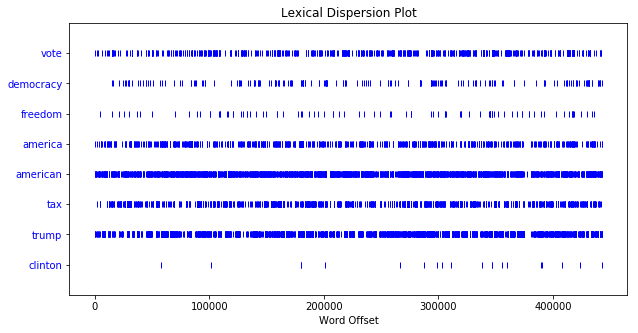

In [26]:
plt.subplots(figsize=(10,5))
democrat_tweet.dispersion_plot(["vote","democracy","freedom","america","american","tax","trump","clinton"])

**Republican Tweets Plot**

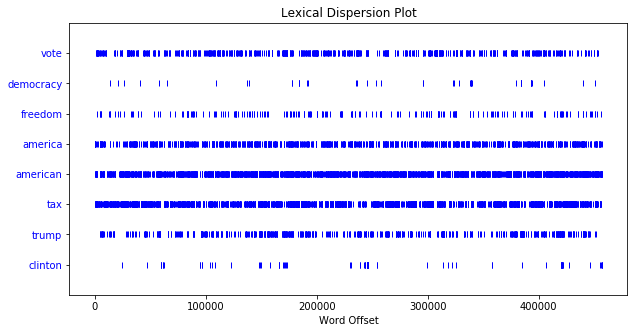

In [27]:
plt.subplots(figsize=(10,5))
republican_tweet.dispersion_plot(["vote","democracy","freedom","america","american","tax","trump","clinton"])

<a id="4"></a> <br>
## 4- Sentiment Analysis


The **polarity** score is a float within the range [-1.0, 1.0]. And it represents emotions expressed in a sentence. 
1 means positive statement and -1 means a negative statement.

The **subjectivity ** is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.  And it refers to personal opinion, emotion or judgment. 

In [28]:
from textblob import TextBlob
democratblob=TextBlob(str(democrat_tweets))
republicanblob=TextBlob(str(republican_tweets))

Using TextBlob, you can see polarity and subjectivity scores both parties. 

In [29]:
democratblob.sentiment

Sentiment(polarity=0.16536069955855845, subjectivity=0.4648999095113135)

In [30]:
republicanblob.sentiment

Sentiment(polarity=0.19836825482009132, subjectivity=0.4590716830328091)